# SN1998S and Template

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from astropy.table import Table, Column
import astropy.units as u
import pycoco as pcc
import json
from scipy.integrate import simps

Change SN_name to retrieve data from that super nova provided its stored in the data file

In [2]:
SN_folder = "/Users/bertiepwhite/code/Data/"    #The location where the .jsonn files are stored before handling
SN_name = "SN1998S"                             #Current Supernova being worked on 
SN_file_name = SN_name + ".json"                #Produces the file name
path = os.path.join(SN_folder,SN_file_name)     #Produces the file location


#Creating the file for the data to be deposited
dat_file_name = SN_name +'.dat'
file_location = SN_folder + dat_file_name
print(dat_file_name,file_location)
f = open(file_location,'w+')
f.close()


SN1998S.dat /Users/bertiepwhite/code/Data/SN1998S.dat


Retrieving the data and splitting into 2 ditionaries one for photometry (ph) one for spectra (sp)

In [3]:
data = json.load(open(path,'r'))                #Grabs the file

ph_dict = data[SN_name]["photometry"]           #Spits the file into the 2 components
sp_dict = data[SN_name]["spectra"]              

ph_dict[3] #This is included to check the general form is as expected

{'band': 'V',
 'magnitude': '13.39',
 'source': '14,18',
 'time': '50877.79',
 'u_time': 'MJD'}

Generating a list of the filters used

In [4]:
j = 0
filter_list = []

for i in range (0,528):
    if ph_dict[j]['magnitude'] != 0:
        band = ph_dict[j]['band']
        if band not in filter_list:
            filter_list.append(band)
        j += 1
filter_list

['C', 'B', 'V', 'R', 'I']

Producing a list of the full names corrosponding to the list above

In [5]:
filt_dict = {"B" : "BessellB",
             "V" : "BessellV",
             "R" : "BessellR",
             "I" : "BessellI",
             "U" : "BessellU"}

Generating the data columns, We see they take the form Band, magnitude, errror, time

In [ ]:
band_list = []
mag_list = []
mag_err_list = []
time_list = []
j = 0


for a in range(0,528):
    data_entry = []
    
    #Using the band shorthand given and converting that into the full name
    key = (ph_dict[j]['band'])
    if key in filt_dict.keys():
        band = filt_dict[key]
        band_list.append(band)
    else:
        band = 'skip'
        
    if band != 'skip':
        mag_list.append(float(ph_dict[j]['magnitude'])) #Simply apppending the magnitude

        try:
            mag_err_list.append(float(ph_dict[j]['e_magnitude'])) #Appending the error on the magnitude and putting n/a 
        except KeyError:                                 #if that information is unavailable
            mag_err_list.append("n/a")
        
        
        time_list.append(ph_dict[j]['time']) #Appending the time into the row
        
    j += 1
    
    

In [7]:
t = Table([band_list,mag_list,mag_err_list,time_list], names = ('filter','mag','mag_err', 'MJD'))
t.show_in_notebook

<bound method Table.show_in_notebook of <Table length=124>
 filter    mag   mag_err   MJD   
  str8   float64   str3    str8  
-------- ------- ------- --------
BessellB   13.48     n/a 50877.79
BessellV   13.39     n/a 50877.79
BessellV   13.17     n/a 50878.61
BessellB   13.25     n/a 50878.66
BessellV   12.94     n/a 50879.55
BessellB   13.07     n/a 50879.61
BessellV   12.29     n/a 50882.69
BessellB   12.76     n/a  50884.7
BessellV   12.46     n/a 50884.71
BessellB   12.77     n/a 50885.53
     ...     ...     ...      ...
BessellV    16.3     n/a  50998.9
BessellB   16.85     n/a  51000.0
BessellI    15.1     n/a  51000.0
BessellR   15.35     n/a  51000.0
BessellV   16.14     n/a  51000.0
BessellB   17.29     n/a  51021.0
BessellI   15.53     n/a  51021.0
BessellR   15.67     n/a  51021.0
BessellV   16.64     n/a  51021.0
BessellV    18.5     n/a 51137.13>

In [8]:
ph_dict[0]

{'band': 'C',
 'magnitude': '16',
 'source': '14,18',
 'time': '50874.7',
 'u_time': 'MJD'}

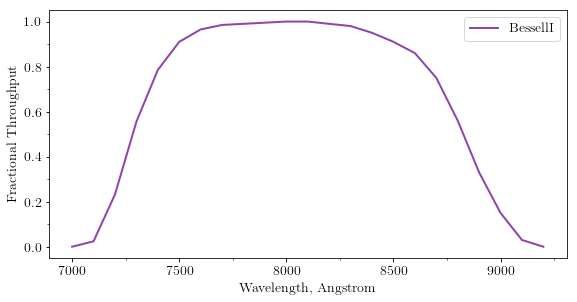

/Users/bertiepwhite/code/pycoco/pycoco/utils.py:192: UserWarning: /Users/berto/Code/CoCo/data/filters/BessellI.dat is not a valid file. Returning 'False'.
  " is not a valid file. Returning 'False'.")
/Users/bertiepwhite/code/pycoco/pycoco/functions.py:86: UserWarning: Couldn't load the filter
  warnings.warn("Couldn't load the filter")


AttributeError: 'NoneType' object has no attribute 'resample_response'

In [9]:
# j = 0
# for band in band_list:
#     print(band)
#     filter_object = pcc.load()
#     zero_point = pcc.kcorr.calc_vega_zp(band)
#     mag_list[j] = 10**((zero_point - mag_list[j])/2.5)
#     j += 1
#     print(band)
    
V = pcc.FilterClass()
V.read_filter_file(os.path.join(pcc._default_filter_dir_path, "BessellI.dat"))
V.plot()
zp = pcc.kcorr.calc_vega_zp(filter_name = "BessellI", filter_object = V)

data["flux"] = np.power(10., (data["mag"] + zp)/-2.5)
data["flux_err"] = 1.086 * data["flux"]*(data["dmag"]/data["mag"])
data["zp"] = zp 

phot = pcc.PhotometryClass()

phot.load_table(data, verbose = True)

phot.plot()

plot.show()

In [ ]:
V = pcc.FilterClass()
V.read_filter_file(os.path.join(pcc._default_filter_dir_path, "BessellI.dat"))
V.plot()

In [13]:
band = "BessellB"
filter_file_location = "/Users/bertiepwhite/code/coco/data/filters/"
band_location = filter_file_location + band + ".dat"
filter_obj = pcc.kcorr.load_filter(band_location)
zp = pcc.kcorr.calc_vega_zp(filter_name = "BessellB", filter_object = filter_obj )

print(zp)

/Users/bertiepwhite/code/pycoco/pycoco/utils.py:192: UserWarning: /Users/berto/Code/CoCo/data/filters/BessellB.dat is not a valid file. Returning 'False'.
  " is not a valid file. Returning 'False'.")
/Users/bertiepwhite/code/pycoco/pycoco/functions.py:86: UserWarning: Couldn't load the filter
  warnings.warn("Couldn't load the filter")


AttributeError: 'NoneType' object has no attribute 'resample_response'

In [ ]:
zp = pcc.kcorr.calc_vega_zp(filter_name = "BessellI", filter_object = V)

In [10]:
j=-7
try:
    key = ph_dict[j]['band']
    print(key)
except KeyError:
    print("Nah")
    
    

R


In [ ]:
filt_dict = {"B" : "BessellB",
             "V" : "BessellV",
             "R" : "BessellR",
             "I" : "BessellI",
             "U" : "BessellU"}
t.add_index('filter')

filter_list = []
for band in band_list:
    if band not in filter_list:
        filter_list.append(band)
        
print(filter_list)

In [ ]:
print(filter_list)

In [ ]:
# filter_file_location = "/Users/bertiepwhite/code/coco/data/filters/"
# j = 0
# filter_obj_list = []
# # AB = pcc.kcorr.load_AB()
# vega = pcc.kcorr.load_vega()

# for i in filter_names:
#     filter_name = filter_names[j]
#     if filter_name != "Blank":
#         filter_obj_location = filter_file_location + filter_name +".dat"
#         filter_obj = pcc.kcorr.load_filter(filter_obj_location)
#         filter_obj_list .append(filter_obj)
#     else:
#         filter_obj_list .append("Filter N/A")
#     j += 1


# j = 1
# for i in range(len(data_rows)-1):
#     filter_name = data_rows[j][0] 
#     if filter_name != 'Blank':
#         filter_index = filter_names.index(filter_name)
#         filter_obj = filter_obj_list[index]

#         filter_obj.resample_response(new_wavelength = AB.wavelength)
        
#         transmitted_spec = filter_obj.throughput * AB.flux
#         integrated_flux = simps(transmitted_spec,AB.wavelength)
        
#     j += 1